Delete this block before submission

Mardown cheat cheat : https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#blockquotes

Things to do : 
- Don't forget of the statistical significance aspects of results, for every result, criticize that when interpreting
- 


# Project Milestone2 - Group Concatsanddogs

# The use of women's rights and gender equality rhetoric in the US

### Research Question 4 :

**What is the sentiment analysis of the context of the quotation containing women's rights mention?**

**Can we link the sentiment to the use of women's rights ideology?**

## Librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
#nltk.download('vader_lexicon')

In [2]:
# Changing some pandas default appearance settings 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html
# pd.options.display.max_colwidth = 200
# pd.options.display.max_rows = 100
#pd.reset_option("display.max_colwidth") # reset the options

In [3]:
#pd.reset_option("^display")

In [4]:
#NLP libraries
import spacy, nltk, gensim, sklearn

C:\ProgramData\Anaconda3\envs\ada\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [5]:
#Vader
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [6]:
sns.set_style("whitegrid")

In [35]:
PATH_GENERATED_DATA = 'generated_data/'

## Loading the selected quotes dataframe

In [40]:
# loading the dataframe with selected quotes and additional attributes
df = pd.read_pickle(PATH_GENERATED_DATA+'df_enriched.pkl', compression='infer', storage_options=None)

In [41]:
df.head()

,quoteID,quotation,speaker,date,numOccurrences,probas,urls,aliases,date_of_birth,nationality,...,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,label,candidacy,type,religion
0,2015-03-09-004706,Anything less than women winning 50 per cent o...,Katy Gallagher,2015-03-09 12:30:00,1,"[[Katy Gallagher, 0.5872], [None, 0.4128]]",[http://www.smh.com.au/act-news/women-need-to-...,"[Katherine Gallagher, Katherine Ruth Gallagher]",[+1970-03-17T00:00:00Z],Australia,...,1349152158,NaN,None,politician,Australian Labor Party,NaN,Katy Gallagher,None,item,NaN
1,2017-05-11-081817,"more family-friendly and flexible workplaces, ...",Katy Gallagher,2017-05-11 00:00:37,1,"[[Katy Gallagher, 0.5596], [None, 0.4404]]",[http://www.mediamaxnetwork.co.ke/news/325569/...,"[Katherine Gallagher, Katherine Ruth Gallagher]",[+1970-03-17T00:00:00Z],Australia,...,1349152158,NaN,None,politician,Australian Labor Party,NaN,Katy Gallagher,None,item,NaN
2,2017-06-23-130636,We need more women and parents in Parliament. ...,Katy Gallagher,2017-06-23 03:20:00,1,"[[Katy Gallagher, 0.4996], [None, 0.4403], [La...",[http://www.harpersbazaar.com/culture/features...,"[Katherine Gallagher, Katherine Ruth Gallagher]",[+1970-03-17T00:00:00Z],Australia,...,1349152158,NaN,None,politician,Australian Labor Party,NaN,Katy Gallagher,None,item,NaN
3,2015-04-24-025718,I'd like to congratulate all the winners and f...,Helena Morrissey,2015-04-24 15:33:00,1,"[[Helena Morrissey, 0.8706], [None, 0.1294]]",[http://www.cipd.co.uk/PM/peoplemanagement/b/w...,None,[+1966-03-22T00:00:00Z],United Kingdom,...,1393002378,NaN,None,business executive,NaN,NaN,Helena Morrissey,None,item,NaN
4,2015-04-08-011609,Clearly we have got a long way to go before we...,Helena Morrissey,2015-04-08 18:28:01,1,"[[Helena Morrissey, 0.5805], [None, 0.2061], [...",[http://feeds.theguardian.com/c/34708/f/663879...,None,[+1966-03-22T00:00:00Z],United Kingdom,...,1393002378,NaN,None,business executive,NaN,NaN,Helena Morrissey,None,item,NaN


In [42]:
print(f'The dataframe has {len(df)} entries')

The dataframe has 55328 entries


In [43]:
df['quotation'].head(2)

0    Anything less than women winning 50 per cent o...
1    more family-friendly and flexible workplaces, ...
Name: quotation, dtype: object

## Sentiment analysis prep

In [44]:
analyzer = SentimentIntensityAnalyzer()
vs = analyzer.polarity_scores(df['quotation'].loc[1])

***
### Plot testing

For a first step, sentiment analysis using Vader will be done. We could potentially use other tools such as the current state of the art in sentiment analysis and text classification XLNet, or otherwise DeepMoji or Flair.

In [14]:
def sentiment_plot(scores):
    '''
    This function plots the polarity score for every word in a quote
    inputs : dict containing the polarity score for the whole sentence, 
    and the one for every word of the sentence
    outputs : the plot
    '''
    sns.set(rc={'figure.figsize':(20,3)})
    sns.heatmap(pd.DataFrame(scores).set_index("quotation").T,center=0, annot=True, cmap = "PiYG",annot_kws={"size": 10})

In [15]:
quotation = df['quotation'].loc[1]

In [16]:
analyzer.polarity_scores(quotation)

{'neg': 0.0, 'neu': 0.708, 'pos': 0.292, 'compound': 0.946}

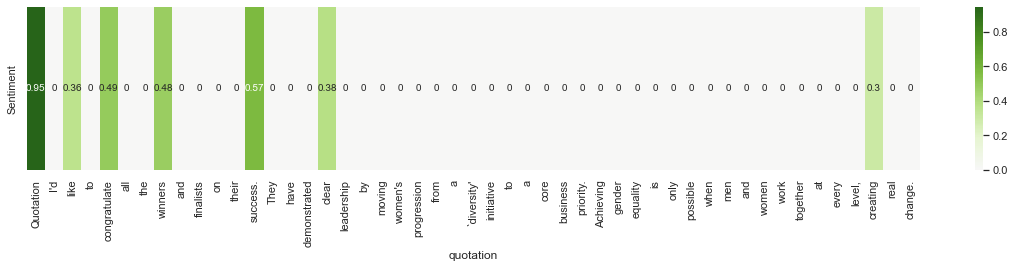

In [17]:
sentiment_plot({
    "quotation":["Quotation"] + quotation.split(),
    "Sentiment":[analyzer.polarity_scores(quotation)["compound"]] + [analyzer.polarity_scores(word)["compound"] for word in quotation.split()]
})

## Sub question 1 : What is the sentiment analysis of the context of the quotations containing women's rights mention?

In [18]:
# only add tokenizer as preprocessing here ( I think we don't need more for now)

In [19]:
nlp = spacy.load('en')
nlp.remove_pipe('parser')
nlp.remove_pipe('tagger')
nlp.remove_pipe('ner')
#nlp.remove_pipe('textcat') 

('ner', <spacy.pipeline.pipes.EntityRecognizer at 0x2264a2da1c0>)

In [20]:
print(df['quotation'].loc[1], '\n')
print(nlp(df['quotation'].loc[1]))

I'd like to congratulate all the winners and finalists on their success. They have demonstrated clear leadership by moving women's progression from a `diversity' initiative to a core business priority. Achieving gender equality is only possible when men and women work together at every level, creating real change. 

I'd like to congratulate all the winners and finalists on their success. They have demonstrated clear leadership by moving women's progression from a `diversity' initiative to a core business priority. Achieving gender equality is only possible when men and women work together at every level, creating real change.


In [46]:
df['sentiment'] = df['quotation'].apply(lambda x : analyzer.polarity_scores(x)['compound'])

In [47]:
df['sentiment'].head()

0    0.6271
1    0.6557
2    0.6557
3    0.9460
4    0.6705
Name: sentiment, dtype: float64

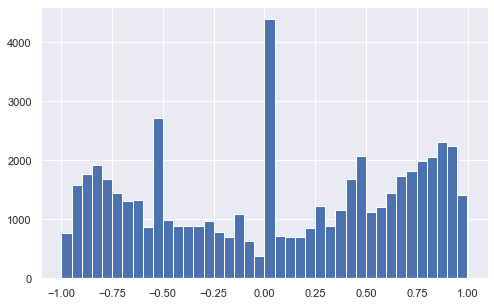

In [48]:
df['sentiment'].hist(bins=40, figsize = [8,5])
plt.show()

There seems to be a lof of quotes that are classified as neutral, but we can see that the data is polarised 

### Sentiment in function of time

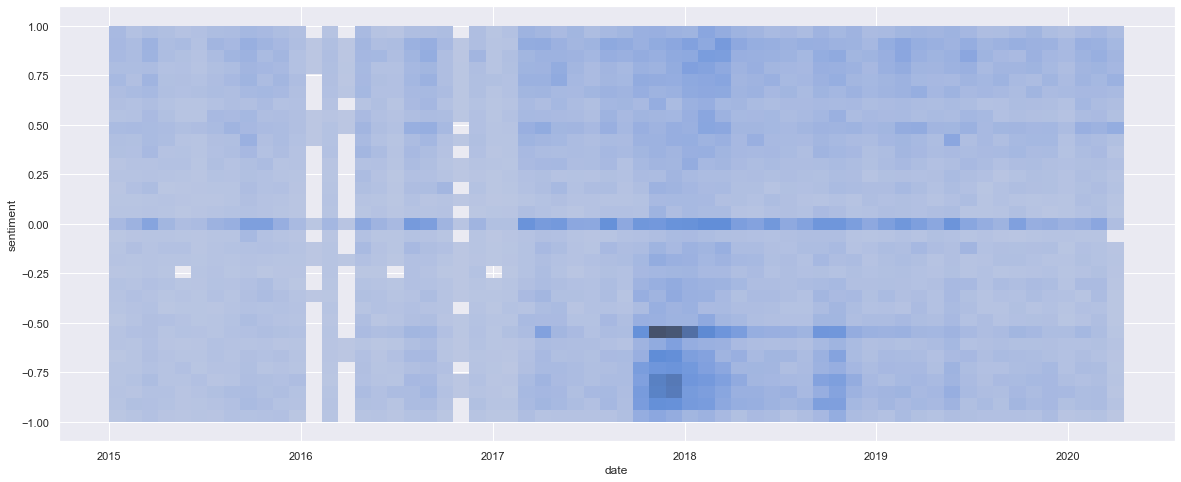

In [49]:
plt.figure(figsize=(20,8))
sns.histplot(df[['date','sentiment']],x="date", y="sentiment")
plt.show()

Seems like there were a lot of negative quotes end of 2017
We could maybe use the list provided by wikipedia : https://en.wikipedia.org/wiki/2017_in_the_United_States#October to see if there were quotes about that
 
>Tough talk on immigration: Shortly after taking office in January, President Trump sought to make good on his “America First” campaign promise by imposing a series of contentious travel bans on citizens from several Muslim-majority nations.

>Federal district courts struck down implementation of the bans, though a Supreme Court ruling in December 2017 reversed the lower courts’ decisions, allowing the administration to fully implement the bans.

>Trump also continued to promote his election campaign idea of a border wall with Mexico that he says will help quell illegal immigration from Mexico and points south.

https://www.history.com/topics/21st-century/2017-events#section_1

In [25]:
# sort dataframe by date
# df.sort_values(ascending=[True],by=['date'],inplace=True)
# df.head()

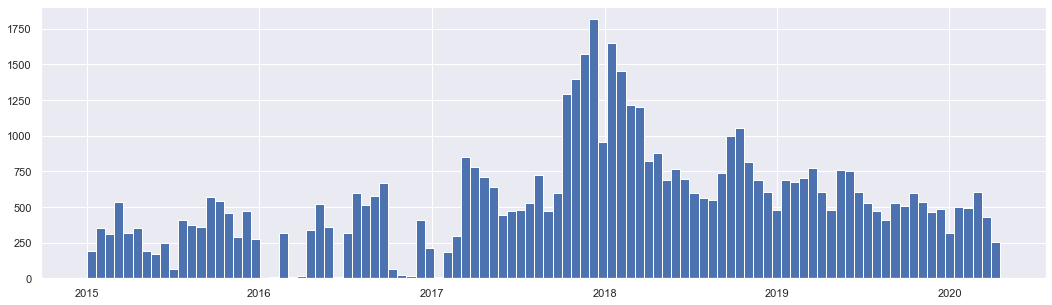

In [50]:
# quotes in function of time
df['date'].hist(bins = 100, figsize = [18,5])
plt.show() 
# this graph should probably go into a general presentation of our data instead of here 

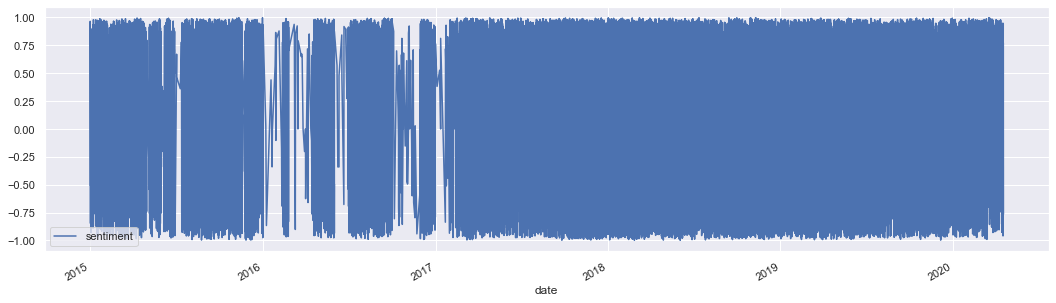

In [51]:
df.plot(x = 'date',y='sentiment', figsize = [18,5])
plt.show()
# not much info from this graph

#### separate the data into positive, negative, and neutral quotes

In [52]:
# take a threshold and separate the data in two : 
# threshold choice currently partly arbitrary
df_positive = df.query('sentiment > 0.25')
df_negative = df.query('sentiment < -0.25')
df_neutral  = df.query('sentiment > -0.25').query('sentiment < 0.25')

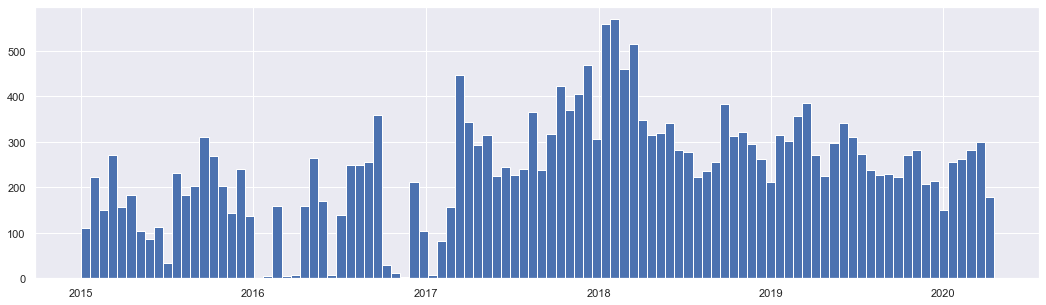

In [53]:
df_positive['date'].hist(bins = 100, figsize = [18,5])
plt.show()

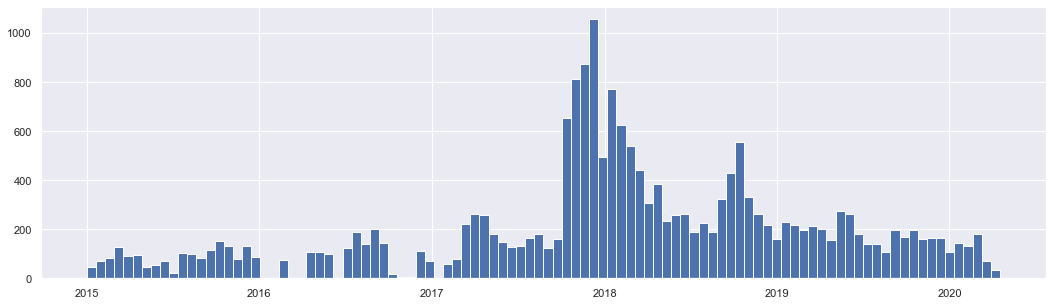

In [54]:
df_negative['date'].hist(bins = 100, figsize = [18,5])
# seems like around 2018 there were a lot of negative quotations
plt.show()

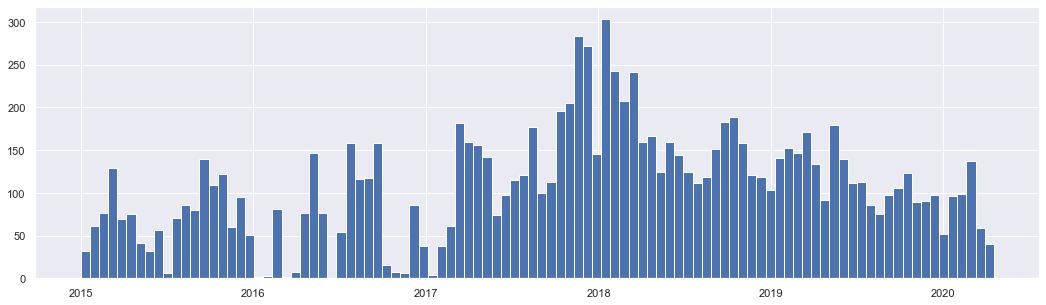

In [55]:
df_neutral['date'].hist(bins = 100, figsize = [18,5])
plt.show()

## Sub question 2 : Can we link the sentiment to the use of women's rights ideology?

- Seperate the speakers in function of their political party
- calculate the average of the compound score (from Vader) on their quotes. 
- show distribution in function of party

Maybe we will find a relation between the compound score and the general opinion of the party.

### Sentiment and political party

In [56]:
df.columns

Index(['quoteID', 'quotation', 'speaker', 'date', 'numOccurrences', 'probas',
       'urls', 'aliases', 'date_of_birth', 'nationality', 'gender',
       'lastrevid', 'ethnic_group', 'US_congress_bio_ID', 'occupation',
       'party', 'academic_degree', 'label', 'candidacy', 'type', 'religion',
       'sentiment'],
      dtype='object')

In [58]:
df['party'].nunique()

589

In [59]:
df['party'].unique()

array(['Australian Labor Party', nan, 'Democratic Party',
       'Liberal Party of Australia', 'Republican Party',
       'Liberal Party of Canada', 'Alberta Liberal Party',
       'independent politician',
       'Communist Party of India (Marxist–Leninist) Liberation',
       'African National Congress', 'National Party of Australia – NSW',
       'New Zealand National Party',
       'Minnesota Democratic–Farmer–Labor Party',
       'National Democratic Congress', 'Justice and Development Party',
       'New Democratic Party', 'Democratic Action Party',
       'Fiji First Party', 'Liberty Union Party',
       'New Democratic Party of Manitoba', 'Ontario Liberal Party',
       'Bulgarian Socialist Party', 'Bharatiya Janata Party',
       'Conservative Party of Canada', 'Truth and Justice Party',
       'Socialist Party', 'Worker-communist Party of Iran',
       'Labour Party', 'Indian National Congress',
       'Progressive Conservative Association of Alberta',
       'Communist Party

In [61]:
df_grouped_by_partyname = df.groupby(df.party).size()

In [65]:
df.groupby(df.party).size().sort_values(ascending=False)

party
Democratic Party                  8783
Republican Party                  3594
Bharatiya Janata Party            1083
Liberal Party of Canada           1024
Labour Party                       525
                                  ... 
Mazingira Green Party of Kenya       1
Religious Zionist Party              1
Republican Left of Catalonia         1
One NL                               1
Respect Party                        1
Length: 589, dtype: int64

In [74]:
Democrat_quotes = df.query('party == "Democratic Party" ')
Republican_quotes = df.query('party == "Republican Party" ')

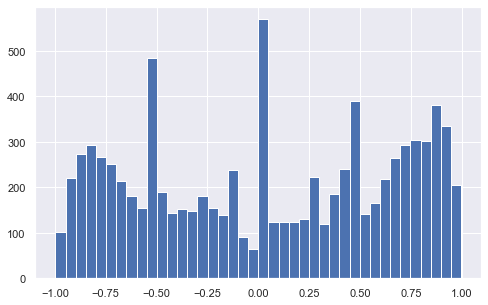

In [77]:
Democrat_quotes['sentiment'].hist(bins=40, figsize = [8,5])
plt.show()

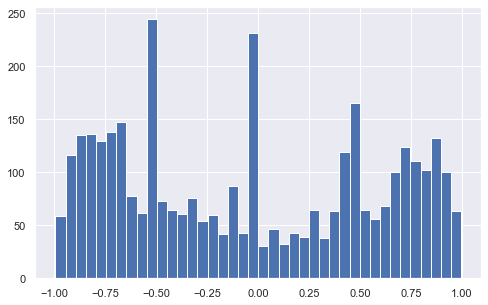

In [78]:
Republican_quotes['sentiment'].hist(bins=40, figsize = [8,5])
plt.show()

### Sentiment in function of gender ?

In [79]:
df['gender'].nunique()

11

In [80]:
df['gender'].unique()

array(['female', 'male', nan, 'non-binary', 'transgender female',
       'genderfluid', 'cisgender female', 'transgender male',
       'cisgender male', 'genderqueer', 'shemale', 'intersex'],
      dtype=object)

In [81]:
df.groupby(df.gender).size().sort_values(ascending=False)

gender
female                28286
male                  26274
transgender female       89
non-binary               80
genderfluid              26
transgender male         21
cisgender female         15
genderqueer               4
shemale                   3
intersex                  2
cisgender male            1
dtype: int64

Most of the data is from the male and female genders, so we will currently base our analysis on those two genders :

In [82]:
female_quotes = df.query('gender == "female" ')
male_quotes = df.query('gender == "male" ')

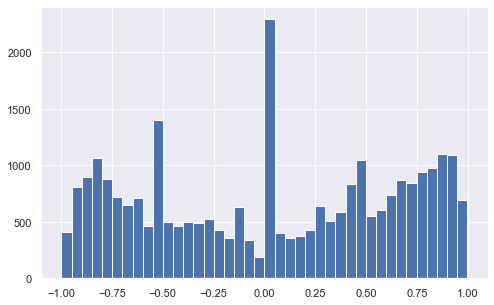

In [83]:
female_quotes['sentiment'].hist(bins=40, figsize = [8,5])
plt.show()

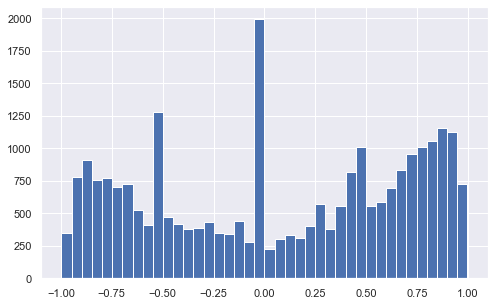

In [84]:
male_quotes['sentiment'].hist(bins=40, figsize = [8,5])
plt.show()